In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/contractions/contractions.csv
/kaggle/input/emotion-dataset/validation.csv
/kaggle/input/emotion-dataset/training.csv
/kaggle/input/emotion-dataset/test.csv


a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4),surprise(5).

In [2]:
emo_la={0:'sadness',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'}

In [3]:
emo_la[1]

'joy'

In [4]:
data=pd.read_csv('../input/emotion-dataset/training.csv')
data

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


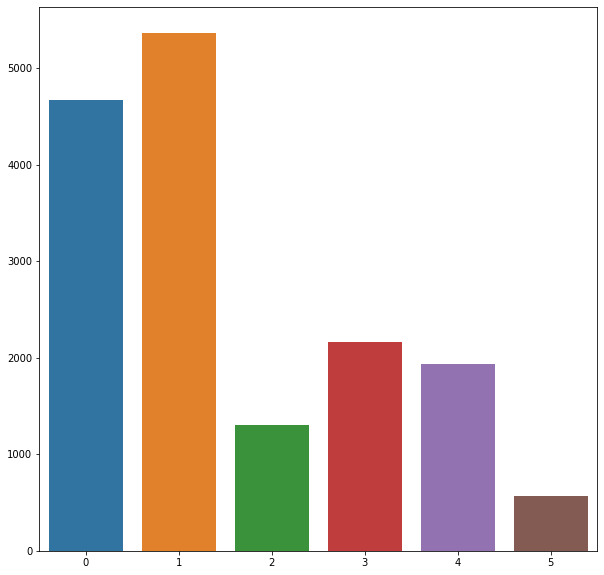

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.barplot(x=data['label'].value_counts().index,y=data['label'].value_counts().values)
palette_color = sns.color_palette('bright')
  

  
# displaying chart
plt.show()

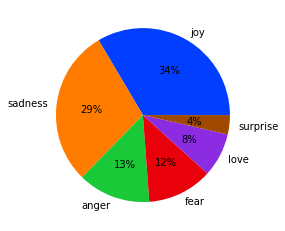

In [6]:
plt.pie(data['label'].value_counts(), labels=data['label'].apply(lambda x:emo_la[x]).value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [7]:
pd.options.display.max_colwidth = 1000
data[data['label']==5].loc[32]


text     i have seen heard and read over the past couple of days i am left feeling impressed by more than a few companies
label                                                                                                                   5
Name: 32, dtype: object

In [8]:
import nltk
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim

import re
data_cl=data.copy()
contractions=pd.read_csv('../input/contractions/contractions.csv',index_col='Contraction')
contractions.index = contractions.index.str.lower()
contractions.Meaning = contractions.Meaning.str.lower()
contractions_dict = contractions.to_dict()['Meaning']
k=stopwords.words('english')

k=[i for i in k if i!='not']


[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [9]:
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"
lemmatizer = WordNetLemmatizer()
def preprocess_apply(tweet):

    tweet = tweet.lower()

    # Replace all URls with '<url>'
    tweet = re.sub(urlPattern,'<url>',tweet)
    # Replace @USERNAME to '<user>'.
    tweet = re.sub(userPattern,'<user>', tweet)
    
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    # Replace all emojis.
    tweet = re.sub(r'<3', '<heart>', tweet)
    tweet = re.sub(smileemoji, '<smile>', tweet)
    tweet = re.sub(sademoji, '<sadface>', tweet)
    tweet = re.sub(neutralemoji, '<neutralface>', tweet)
    tweet = re.sub(lolemoji, '<lolface>', tweet)

    for contraction, replacement in contractions_dict.items():
        tweet = tweet.replace(contraction, replacement)

    # Remove non-alphanumeric and symbols
    tweet = re.sub(alphaPattern, ' ', tweet)

    # Adding space on either side of '/' to seperate words (After replacing URLS).
    tweet = re.sub(r'/', ' / ', tweet)
    tweet = nltk.word_tokenize(tweet)
    tweet = [lemmatizer.lemmatize(sentence)  for sentence in tweet if sentence not in k]
        #if sentence not in stopwords.words('english')
    return tweet

In [10]:
def text_cleaning(x):
    sentences=[]
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    for i in range(1):
        paragraph=x
        text = re.sub(r'\[[0-9]*\]',' ',paragraph)
        text =' '.join(word for word in text.split(' ') if not word.startswith('@'))
        text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
        sentenc = nltk.word_tokenize(text)
        #sentenc = sentenc.split()
        #print(sentenc)
        sentenc = [lemmatizer.lemmatize(sentence)  for sentence in sentenc if sentence not in stopwords.words('english')]
        #if sentence not in stopwords.words('english')
    return sentenc   

In [11]:
data_cl['text']=data['text'].apply(lambda x:preprocess_apply(x))

In [12]:
preprocess_apply("  not sad ")


['not', 'sad']

In [13]:
# for i in range(len(data_cl['text'])):
#     if any('servant' in z for z in X_test.loc[i]):
#         print(i,'yes')
#         break
    
# data_cl.loc[6,'text']

In [14]:
data_cl['text']=data_cl['text'].map(lambda x:' '.join(x))
data_cl.loc[6,'text']

'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny'

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
cv=TfidfVectorizer(max_features=3000).fit(data_cl['text'])
X = cv.fit_transform(data_cl['text']).toarray()
X.shape

(16000, 3000)

In [16]:
y=data_cl['label']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [19]:
X_test=pd.read_csv('../input/emotion-dataset/validation.csv')
y_test=X_test['label']
X_test=X_test.drop(columns=['label'])
X_test['text']=X_test['text'].apply(lambda x:text_cleaning(x))
X_test['text']=X_test['text'].map(lambda x:' '.join(x))
X_test = cv.transform(X_test['text'])
X_test

<2000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 15545 stored elements in Compressed Sparse Row format>

In [20]:
X_test

<2000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 15545 stored elements in Compressed Sparse Row format>

In [21]:

y_pred = classifier.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.8765
Testing F1 score: 0.8765916732070523


In [22]:
text='happy'
text=list(str(text).split("."))
text=pd.Series(text)
print(text)
text=text.apply(lambda x:preprocess_apply(x))
print(text)
text=text.apply(lambda x:' '.join(x))
print(text)
text = cv.transform(text)
emo_la[classifier.predict(text)[0]]
[emo_la[s] for s in classifier.predict(text)]

0    happy
dtype: object
0    [happy]
dtype: object
0    happy
dtype: object


['joy']

In [23]:
import pickle
filename = 'finalized_model.pkl'
with open(filename,'wb') as f:
    pickle.dump(classifier,f)

In [24]:
import pickle
filename = 'finalized_model_tfidf.pkl'
with open(filename,'wb') as f:
    pickle.dump(cv,f)

In [25]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(data_cl.text)]
#display the tagged docs
#card_docs

In [26]:
#instantiate model
model = Doc2Vec(vector_size=24, window=2, min_count=1, workers=8, epochs = 100)
#build vocab
model.build_vocab(card_docs)
#train model
model.train(card_docs, total_examples=model.corpus_count
            , epochs=model.epochs)


In [27]:
#generate vectors
card2vec = [model.infer_vector((data_cl.text[i].split(' '))) 
            for i in range(0,len(data_cl.text))]
#card2vec


In [28]:
#Create a list of lists
dtv= np.array(card2vec).tolist()
#set list to dataframe column
data_cl['card2vec'] = dtv
data_cl.head(2)

,text,label,card2vec
0,didnt feel humiliated,0,"[-0.3819851279258728, 0.15394435822963715, -0.021170392632484436, 0.27840322256088257, 0.2652345299720764, -0.166657954454422, 0.3465566039085388, -0.007785693742334843, -0.49125975370407104, 0.19275838136672974, 0.3196447789669037, 0.2265784740447998, 0.008990280330181122, 0.296679824590683, -0.46637463569641113, 1.0021406412124634, -0.7387625575065613, 0.37057363986968994, -0.5927822589874268, -0.3273734748363495, 0.4247382581233978, -0.3652076721191406, 1.278205156326294, 0.3556501567363739]"
1,go feeling hopeless damned hopeful around someone care awake,0,"[-0.5699517130851746, -0.4099954068660736, 0.099392369389534, 2.3157553672790527, 0.873814582824707, -0.6733456254005432, -0.08914496004581451, -0.441470205783844, 1.5727996826171875, -0.8361716866493225, 0.07124961912631989, -0.4225904643535614, 0.8666011691093445, 0.4051832854747772, -0.2955300807952881, 1.410760760307312, -0.6670250296592712, -0.009629331529140472, 2.472445487976074, -0.02219296433031559, -0.02088821306824684, 0.03427794575691223, -0.4174686670303345, -2.1065173149108887]"


In [29]:
X=data_cl['card2vec']
y=data_cl['label']

In [30]:
X=pd.DataFrame(item for item in X)
X

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.381985,0.153944,-0.021170,0.278403,0.265235,-0.166658,0.346557,-0.007786,-0.491260,0.192758,...,-0.466375,1.002141,-0.738763,0.370574,-0.592782,-0.327373,0.424738,-0.365208,1.278205,0.355650
1,-0.569952,-0.409995,0.099392,2.315755,0.873815,-0.673346,-0.089145,-0.441470,1.572800,-0.836172,...,-0.295530,1.410761,-0.667025,-0.009629,2.472445,-0.022193,-0.020888,0.034278,-0.417469,-2.106517
2,2.397380,-0.316224,0.706801,1.210403,0.075953,-2.009857,-1.414018,0.023282,-0.288569,-1.510616,...,0.518270,-0.447740,-1.139163,-0.672149,-0.032538,-0.216258,-0.438735,0.590187,1.489704,-0.931075
3,-0.547321,0.679911,-0.611029,-0.257685,-1.510152,-0.496362,0.462273,0.762629,-0.379463,-0.465609,...,0.010486,-0.693036,-1.211592,-0.203330,-0.838141,-0.083743,1.779855,0.671913,-0.116498,0.301007
4,-0.328970,-0.062508,-0.030530,0.578695,0.110621,0.014608,-0.634153,-0.266215,-0.010662,-0.444486,...,-0.158245,0.114611,-0.511703,0.555072,0.125012,0.208491,0.188754,0.467709,0.559918,0.083169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.939121,0.401839,0.939790,-0.377624,-1.328635,-0.757472,-0.422712,0.167426,0.127594,-1.642833,...,0.505966,-0.416133,-0.559728,-0.056436,0.360219,0.291459,0.864262,0.049752,0.290619,0.114430
15996,-0.524138,0.424702,-0.033611,0.033420,-0.214739,-0.721832,-0.235299,1.047229,1.577812,-1.242135,...,-1.343829,-0.553652,0.205018,0.316332,0.028905,-0.212773,1.833543,0.315351,0.977875,-0.385132
15997,-0.725004,-0.648440,-0.280490,0.434062,-0.008879,-0.091519,0.093213,0.938464,1.240972,0.276358,...,0.060741,1.235676,-0.079436,1.506684,-0.655742,-0.472568,0.455207,-0.014408,0.769821,0.016373
15998,-0.314991,0.681528,-1.173583,1.045808,0.087753,-0.743962,-0.767268,0.909032,0.424142,-1.116682,...,0.711009,1.042127,-0.296557,-0.338678,-0.996939,-0.506083,0.749597,0.241473,0.604621,0.005807


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
classifier.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [32]:
X_test=pd.read_csv('../input/emotion-dataset/validation.csv')
y_test=X_test['label']
X_test=X_test.drop(columns=['label'])
X_test['text']=X_test['text'].apply(lambda x:text_cleaning(x))
X_test['text']=X_test['text'].map(lambda x:' '.join(x))
card2vec = [model.infer_vector((X_test.text[i].split(' '))) 
            for i in range(0,len(X_test.text))]
#card2vec
#Create a list of lists
X_test= np.array(card2vec).tolist()
X_test=pd.DataFrame(item for item in X_test)
#set list to dataframe column
#X_test

In [33]:
y_pred = classifier.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.4245
Testing F1 score: 0.37157030289444837


#### Word2vec implemented with tfidf

In [34]:
review_text = data['text'].apply(gensim.utils.simple_preprocess)

In [35]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=1,
    workers=4,
)
model.build_vocab(review_text)

model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(1000346, 1362360)

In [36]:
review_text[6]

['ive',
 'been',
 'taking',
 'or',
 'milligrams',
 'or',
 'times',
 'recommended',
 'amount',
 'and',
 'ive',
 'fallen',
 'asleep',
 'lot',
 'faster',
 'but',
 'also',
 'feel',
 'like',
 'so',
 'funny']

In [37]:
model.wv.most_similar('love')

[('sincere', 0.9877151846885681),
 ('remind', 0.9871476888656616),
 ('see', 0.9865649342536926),
 ('important', 0.9856969118118286),
 ('can', 0.9843584895133972),
 ('someone', 0.9837350845336914),
 ('trust', 0.9837065935134888),
 ('entertained', 0.9823615550994873),
 ('understand', 0.9817469716072083),
 ('deal', 0.9815282821655273)]

In [38]:

mod = Word2Vec(review_text, min_count=1)

words = model.wv.index_to_key



In [39]:
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(word ) for word in['give','take']]

['give', 'take']

In [40]:
def sentence_to_vector(model,sentence):
    sentence=pd.Series(data=[sentence])
    sentence=sentence.apply(gensim.utils.simple_preprocess).tolist()
    sentence=[word for sen in sentence for word in sen]
    #print([model.wv.get_vector(word)  for word in sentence])
    return np.mean([model.wv.get_vector(word)  for word in sentence] ,axis=0)
    

In [41]:
sentence=[[1,2],[2,0],[3,8],[4,6]]
np.mean([word  for word in sentence] ,axis=0)

array([2.5, 4. ])

In [42]:
model.wv.get_vector('milligrams')

array([-5.7529719e-03,  2.5119279e-03,  4.3729804e-03, -7.0763188e-03,
        1.2975302e-02, -7.6020807e-03,  4.0179142e-03,  2.2311369e-02,
       -1.6736411e-04, -6.3022124e-03,  1.1552843e-04, -6.7553371e-03,
        1.3111822e-03, -1.2982405e-02, -7.4818139e-03, -1.2381285e-02,
        4.2263577e-03, -9.6993158e-03, -2.0134090e-03, -2.3756040e-02,
        3.2490245e-03,  3.1775960e-03,  1.0452024e-02, -5.9423945e-03,
       -6.2954407e-03,  1.0226001e-02,  1.0784603e-02, -1.0879270e-02,
       -1.5370914e-03,  1.2410718e-02,  9.6511422e-03,  3.2590937e-03,
        1.1775722e-02, -1.7882269e-02, -6.5600839e-03,  1.4742102e-02,
       -3.8657715e-03, -1.2287662e-02,  1.5523309e-03, -2.0027600e-02,
        1.3409132e-02, -1.8263379e-02,  1.0743042e-02, -7.2144186e-03,
       -3.6668470e-03, -6.0044709e-05, -7.3452038e-03, -1.4613527e-03,
       -4.2011150e-05,  9.2271417e-03,  2.1097550e-02,  1.7342978e-03,
       -2.6890046e-03,  1.3902143e-02, -2.4132909e-02,  7.3870335e-04,
      

In [43]:
# sentence=pd.Series(data=["i like cookies"])
# vec=sentence_to_vector(model,sentence)
# vec

In [44]:
data_wv=data.copy()
data_wv['avg_vec']=data_wv['text'].apply(lambda x:sentence_to_vector(model,x))


In [45]:
data_wv['label']

0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

In [46]:
X=data_wv['avg_vec']
y=data_wv['label']

In [47]:
X

0        [-0.32188463, 0.17440051, -0.22609456, 0.33087257, 0.12606949, -1.1191939, 0.7935583, 1.6395494, -0.6420565, -0.32831272, -0.10331243, -1.0404586, -0.33052343, 0.6045938, -0.005613522, -0.442441, 0.4186771, -0.33701178, -0.20839138, -1.3795509, 0.68206906, 0.44788077, 0.7838685, -0.11546322, -0.12487224, -0.25594917, -0.42978966, -0.09771434, -0.45183635, -0.33895728, 0.9446695, -0.026408294, 0.48560107, -0.48398986, -0.26577002, 0.37358108, 0.78265095, -0.5280537, 0.1481964, -0.7513403, -0.10985976, -0.16940407, -0.31111106, 0.037100594, 0.45243347, -0.012908071, -0.63946575, -0.10797914, 0.8162217, 0.45471525, 0.28910646, 0.10037142, -0.050410748, -0.18401392, 0.05656855, 0.15327722, 0.2529219, -0.22968493, -0.31226406, 0.42920613, 0.19684541, 0.08406641, 0.150763, 0.007383404, -0.4805726, 0.48465014, 0.25589252, 0.83327144, -0.9040788, 0.74232644, -0.32287925, 0.11338224, 0.56797725, -0.12761502, 0.57625526, -0.06789013, 0.38776803, -0.015919039, -0.375501, 0.023083298, -0.

In [48]:
X=pd.DataFrame(item for item in X)
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.321885,0.174401,-0.226095,0.330873,0.126069,-1.119194,0.793558,1.639549,-0.642057,-0.328313,...,0.681254,0.352838,0.430895,0.013248,1.405878,0.599863,-0.026724,-0.309348,0.159496,0.399224
1,-0.373693,0.286518,-0.098482,0.122498,0.354513,-1.021193,0.689701,1.646549,-0.506405,-0.332133,...,0.822874,0.223208,0.451422,-0.004016,1.386490,0.581868,0.269996,-0.198195,0.155184,0.234285
2,-0.253662,0.113131,-0.183023,0.155258,0.206100,-0.798080,0.538572,1.243460,-0.484574,-0.181730,...,0.539667,0.228261,0.370904,-0.012373,1.109178,0.457637,0.147862,-0.274277,0.054314,0.331612
3,-0.358336,0.287884,-0.173664,0.177177,0.360567,-1.115409,0.701055,1.696514,-0.506674,-0.400630,...,0.867482,0.225933,0.516561,0.065743,1.444113,0.598016,0.242557,-0.245578,0.117035,0.334326
4,-0.282909,0.199599,-0.060260,0.039318,0.070833,-0.861830,0.543805,1.346807,-0.823601,-0.416921,...,0.692331,0.491125,0.249520,-0.179618,1.177933,0.705917,-0.129577,-0.969654,0.230201,0.440145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.250143,0.216066,-0.138316,-0.009676,0.368506,-0.865284,0.685575,1.472858,-0.431585,-0.205217,...,0.677176,0.168613,0.594146,-0.015313,1.432580,0.454106,0.255049,-0.414690,0.246128,0.184681
15996,-0.257609,0.233515,-0.062115,0.122935,0.264839,-0.844860,0.497831,1.240239,-0.449286,-0.329391,...,0.628473,0.195656,0.378640,0.003720,1.047212,0.472531,0.112745,-0.335035,0.091107,0.289411
15997,-0.351658,0.237139,-0.093579,0.253207,0.212385,-0.951714,0.657830,1.505952,-0.527640,-0.335093,...,0.660423,0.249250,0.428566,-0.043528,1.265910,0.549684,0.081982,-0.355214,0.186751,0.345069
15998,-0.212811,0.263207,-0.150826,0.071407,0.279481,-1.065829,0.636140,1.560335,-0.550553,-0.357804,...,0.825956,0.243642,0.509558,0.007909,1.337485,0.519578,0.172193,-0.402113,0.106907,0.330841


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
classifier.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [50]:
X_test=pd.read_csv('../input/emotion-dataset/validation.csv')
y_test=X_test['label']
X_test=X_test.drop(columns=['label'])
X_test=X_test['text'].apply(gensim.utils.simple_preprocess)
documents=[]
for x in X_test:
    document = [word for word in x if word in model.wv.index_to_key]
    documents.append(document)
len(documents)

2000

In [51]:
counter = 0
for i in range (0,len(documents)):
    if documents[i] == []:
        counter += 1
print(counter)

0


In [52]:
documents=[' '.join(i) for i in documents]
documents=pd.Series(data=documents)

In [53]:
documents

0                                                                                                                           im feeling quite sad and sorry for myself but ill snap out of it soon
1                                                                                                                                feel like am still looking at blank canvas blank pieces of paper
2                                                                                                                                                                              feel like faithful
3                                                                                                                                                                 am just feeling cranky and blue
4                                                                                                                                                     can have for treat or if am feeling festive
                              

In [54]:
X_test=documents.apply(lambda x:sentence_to_vector(model,x))
X_test=pd.DataFrame(item for item in X_test)


In [55]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.316839,0.284448,-0.060535,0.085601,0.287887,-0.996204,0.573630,1.539154,-0.594263,-0.372012,...,0.805716,0.274616,0.444151,-0.049339,1.338452,0.593961,0.189403,-0.478223,0.157577,0.334424
1,-0.296860,0.242616,-0.050213,0.131581,0.282554,-0.801734,0.444469,1.261815,-0.460048,-0.301829,...,0.672463,0.217436,0.434300,0.018131,1.164620,0.510106,0.181354,-0.364062,0.107363,0.333366
2,-0.360510,0.210023,-0.211762,0.210582,0.205148,-1.267561,0.864934,1.790381,-0.627608,-0.383566,...,0.764319,0.371718,0.457254,0.101401,1.546727,0.632760,0.011689,-0.276710,0.185820,0.284412
3,-0.304846,0.251236,-0.027311,0.045741,0.204271,-0.943305,0.571559,1.481343,-0.675440,-0.391351,...,0.753691,0.353438,0.335141,-0.109644,1.222282,0.628853,0.068627,-0.665955,0.181430,0.345720
4,-0.421098,0.342727,-0.112031,0.137348,0.303413,-1.179755,0.734538,1.693973,-0.615452,-0.364688,...,0.949244,0.327190,0.536129,-0.026258,1.620438,0.658165,0.221719,-0.234098,0.115434,0.291723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.318881,0.282114,-0.093329,0.154468,0.324207,-0.899045,0.520966,1.406879,-0.419212,-0.331777,...,0.695725,0.185120,0.509374,0.040568,1.257879,0.504678,0.177590,-0.333480,0.098738,0.335933
1996,-0.382020,0.324072,-0.059027,0.243451,0.322284,-0.750169,0.478207,1.150942,-0.246267,-0.281240,...,0.569837,0.084449,0.412378,0.022121,1.088792,0.401793,0.242420,-0.067890,0.099129,0.256356
1997,-0.394058,0.243079,-0.177148,0.218502,0.340879,-0.997066,0.725875,1.593300,-0.411871,-0.297668,...,0.675948,0.157794,0.510981,0.050969,1.412524,0.510746,0.269953,-0.148384,0.173373,0.274180
1998,-0.482283,0.353073,-0.261143,0.259394,0.402189,-1.260714,0.846205,1.770810,-0.441317,-0.329362,...,0.867081,0.200652,0.463769,0.107994,1.523809,0.623920,0.263897,0.226590,-0.022915,0.210054


In [56]:
y_pred = classifier.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.32
Testing F1 score: 0.27187199139464585


In [57]:
sent=['i am sad ']
sent=pd.DataFrame(data=sent,columns=['data'])
sent=sent['data'].apply(gensim.utils.simple_preprocess)
print(sent)
documents=[]
for x in sent:
    document = [word for word in x if word in model.wv.index_to_key]
    documents.append(document)
print(documents)
counter = 0
for i in range (0,len(documents)):
    if documents[i] == []:
        counter += 1
documents=[' '.join(i) for i in documents]
documents=pd.Series(data=documents)
sent=documents.apply(lambda x:sentence_to_vector(model,x))
sent=pd.DataFrame(item for item in sent)
sent

0    [am, sad]
Name: data, dtype: object
[['am', 'sad']]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.142481,0.358672,-0.156123,0.068395,0.364376,-1.104625,0.412067,1.323321,-0.637972,-0.432549,...,0.925587,0.300702,0.4934,0.045142,1.321364,0.573296,0.153593,-0.560949,-0.182811,0.551899


In [58]:
emo_la[int(classifier.predict(sent))]

'anger'

#### new_word2vec

In [59]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [60]:
df=data.copy()
df.drop_duplicates(inplace=True)

In [61]:
df['text'] = df['text'].apply(lambda x:x.lower())

In [62]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [63]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
story = []
for doc in df['text']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    


In [64]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=1
)
model.build_vocab(story)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(640190, 746965)

In [65]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

In [66]:
df.loc[8823]

text     feel kind petty blogging
label                           3
Name: 8823, dtype: object

In [67]:
from tqdm import tqdm
X = []
for doc in tqdm(df['text'].values):
    X.append(document_vector(doc))

100%|██████████| 15999/15999 [00:06<00:00, 2581.93it/s]


In [68]:
X = np.array(X)
y=df['label']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [70]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.34375